In [2]:
import hecoDEV as heco
output = heco.run('heco.yaml')

Dataset HECO_TEST.nc opened
Volume per particle considered: 10.0 m3
discrete spill step 0 , release time 2025-03-08 00:00:00
discrete spill step 1 , release time 2025-03-08 01:00:00
discrete spill step 2 , release time 2025-03-08 02:00:00
discrete spill step 3 , release time 2025-03-08 03:00:00
discrete spill step 4 , release time 2025-03-08 04:00:00
discrete spill step 5 , release time 2025-03-08 05:00:00


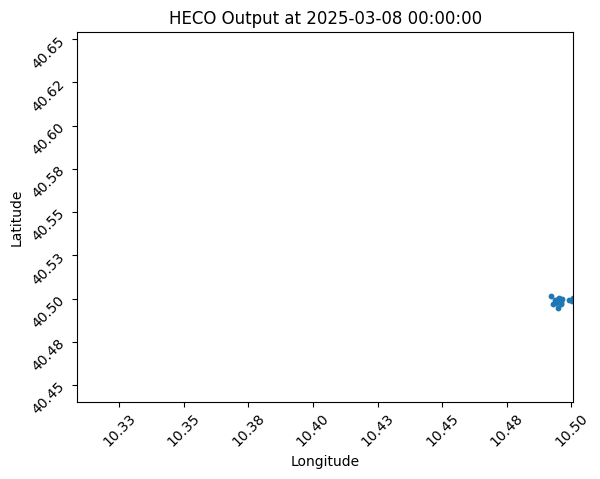

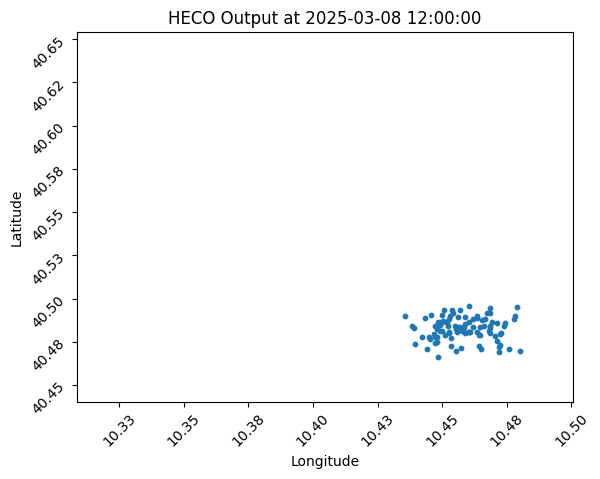

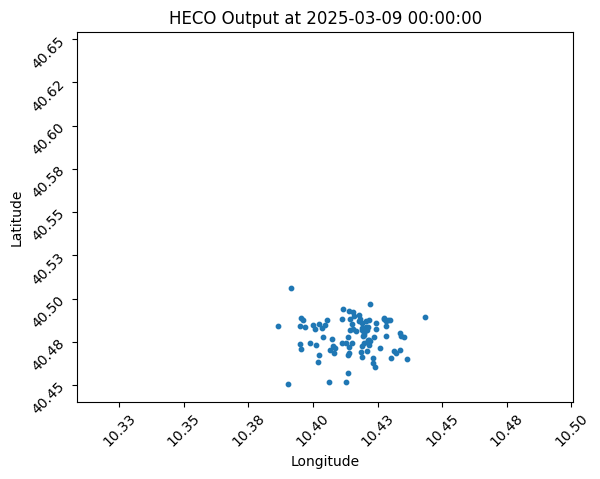

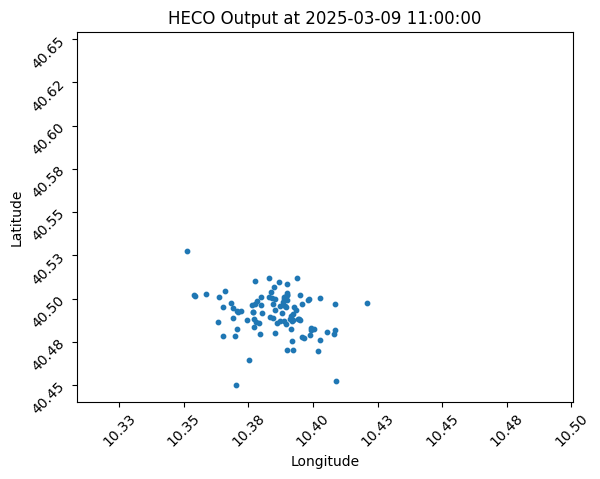

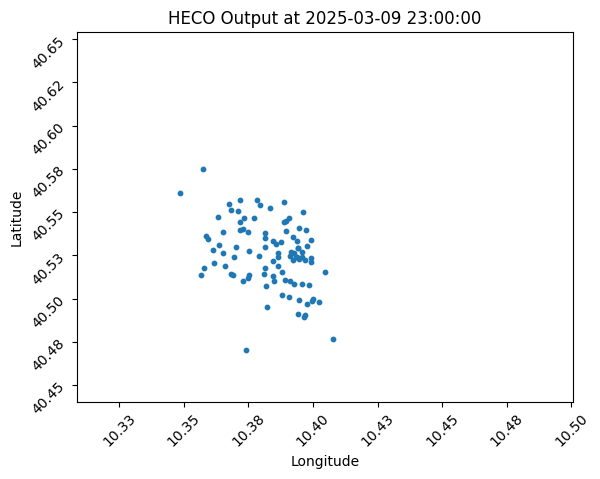

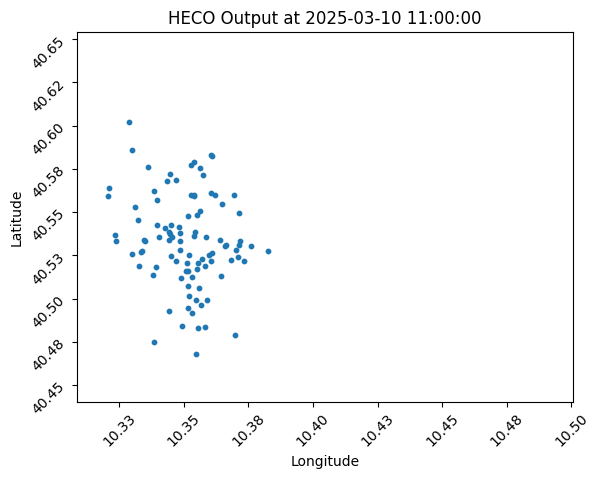

In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plotsnumber = 6
time_min = output['time'].min()
time_max = output['time'].max()
time_delta = (time_max - time_min) / plotsnumber
target_timestamps = [time_min + i * time_delta for i in range(plotsnumber)]

# Find nearest actual timestamps in the dataframe
timestamps = []
for target_ts in target_timestamps:
    nearest_idx = (output['time'] - target_ts).abs().idxmin()
    nearest_ts = output['time'].iloc[nearest_idx]
    timestamps.append(nearest_ts)

for i, ts in enumerate(timestamps):
    #print(f"Timestamp {i+1}: {ts}")
    #retrive the lon and lat for the current timestamp
    output_ts = output[output['time'] == ts]
    fig, ax = plt.subplots()
    # set plot bounds
    x_max = output['lon'].max()
    x_min = output['lon'].min()
    y_max = output['lat'].max()
    y_min = output['lat'].min()
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'HECO Output at {ts}')
    # Format axis labels to 2 decimal places
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:.2f}'))
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, p: f'{y:.2f}'))

    # Rotate axis labels
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)

    
    # plot the data
    sc = ax.scatter(output_ts['lon'], output_ts['lat'], s=10)
    plt.show()

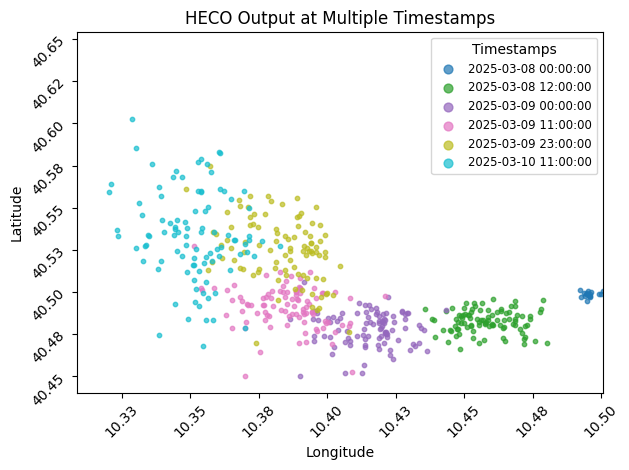

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import matplotlib.cm as cm


plotsnumber = 6
time_min = output['time'].min()
time_max = output['time'].max()
time_delta = (time_max - time_min) / plotsnumber
target_timestamps = [time_min + i * time_delta for i in range(plotsnumber)]

# Find nearest actual timestamps in the dataframe
timestamps = []
for target_ts in target_timestamps:
    nearest_idx = (output['time'] - target_ts).abs().idxmin()
    nearest_ts = output['time'].iloc[nearest_idx]
    timestamps.append(nearest_ts)

fig, ax = plt.subplots()
# set plot bounds
x_max = output['lon'].max()
x_min = output['lon'].min()
y_max = output['lat'].max()
y_min = output['lat'].min()
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'HECO Output at Multiple Timestamps')
# Format axis labels to 2 decimal places
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:.2f}'))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, p: f'{y:.2f}'))

# Rotate axis labels
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Generate 6 different colors
colors = cm.tab10(np.linspace(0, 1, plotsnumber))

for i, ts in enumerate(timestamps):
    output_ts = output[output['time'] == ts]
    sc = ax.scatter(output_ts['lon'], output_ts['lat'], 
                   c=[colors[i]], s=10, 
                   label=f'{ts}', alpha=0.7)

# Add legend
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.legend(loc='upper right', fontsize='small', markerscale=2, title='Timestamps')
plt.tight_layout()
plt.show()

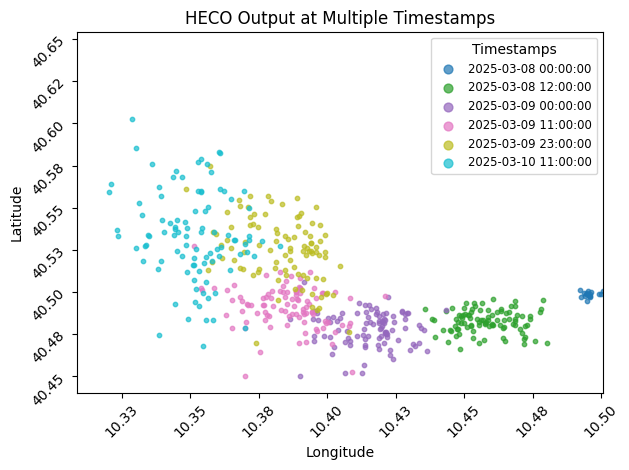

In [17]:
def MultitimestampPlot(output,multiple):
    '''Plot HECO output at multiple timestamps.
    Args:
        output (DataFrame): HECO output data.
        multiple (int): Number of timestamps to plot.
    Returns:
        None: Displays the plot.
    '''
    import matplotlib.pyplot as plt
    from matplotlib.ticker import FuncFormatter
    import numpy as np
    import matplotlib.cm as cm


    plotsnumber = multiple
    time_min = output['time'].min()
    time_max = output['time'].max()
    time_delta = (time_max - time_min) / plotsnumber
    target_timestamps = [time_min + i * time_delta for i in range(plotsnumber)]

    # Find nearest actual timestamps in the dataframe
    timestamps = []
    for target_ts in target_timestamps:
        nearest_idx = (output['time'] - target_ts).abs().idxmin()
        nearest_ts = output['time'].iloc[nearest_idx]
        timestamps.append(nearest_ts)

    fig, ax = plt.subplots()
    # set plot bounds
    x_max = output['lon'].max()
    x_min = output['lon'].min()
    y_max = output['lat'].max()
    y_min = output['lat'].min()
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'HECO Output at Multiple Timestamps')
    # Format axis labels to 2 decimal places
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:.2f}'))
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, p: f'{y:.2f}'))

    # Rotate axis labels
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)

    # Generate 6 different colors
    colors = cm.tab10(np.linspace(0, 1, plotsnumber))

    for i, ts in enumerate(timestamps):
        output_ts = output[output['time'] == ts]
        sc = ax.scatter(output_ts['lon'], output_ts['lat'], 
                    c=[colors[i]], s=10, 
                    label=f'{ts}', alpha=0.7)

    # Add legend
    # ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.legend(loc='upper right', fontsize='small', markerscale=2, title='Timestamps')
    plt.tight_layout()
    plt.show()
    
# Example usage of the function
MultitimestampPlot(output, 6)

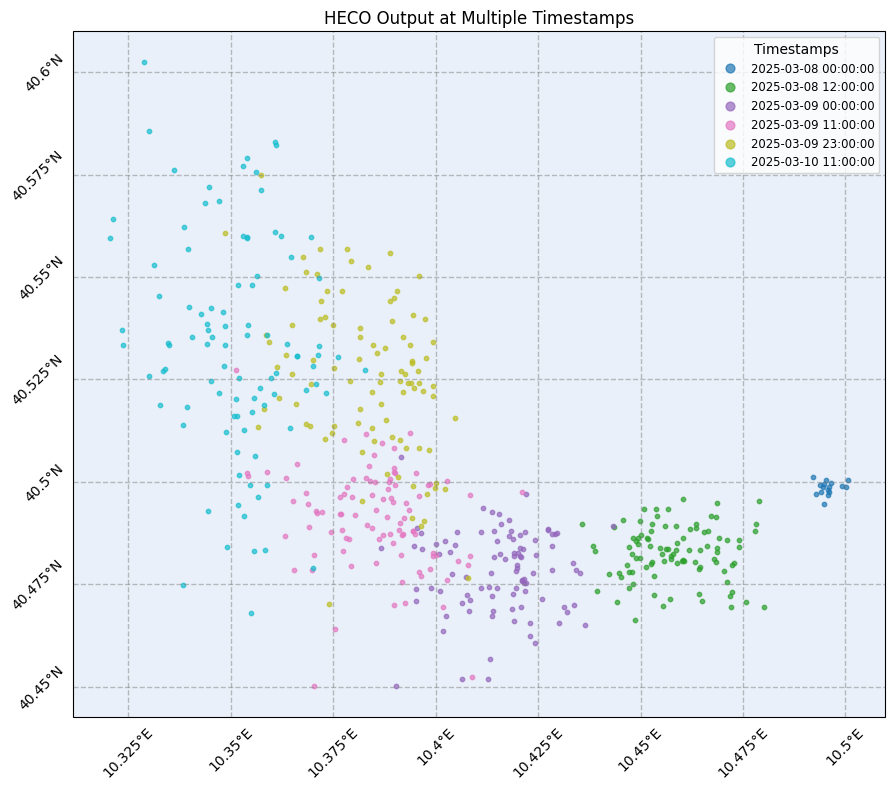

In [22]:
def MultitimestampPlot(output,multiple):
    '''Plot HECO output at multiple timestamps.
    Args:
        output (DataFrame): HECO output data.
        multiple (int): Number of timestamps to plot.
    Returns:
        None: Displays the plot.
    '''
    import matplotlib.pyplot as plt
    from matplotlib.ticker import FuncFormatter
    import numpy as np
    import matplotlib.cm as cm
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    import ssl

    # prevent SSL error
    ssl._create_default_https_context = ssl._create_unverified_context

    plotsnumber = multiple
    time_min = output['time'].min()
    time_max = output['time'].max()
    time_delta = (time_max - time_min) / plotsnumber
    target_timestamps = [time_min + i * time_delta for i in range(plotsnumber)]

    # Find nearest actual timestamps in the dataframe
    timestamps = []
    for target_ts in target_timestamps:
        nearest_idx = (output['time'] - target_ts).abs().idxmin()
        nearest_ts = output['time'].iloc[nearest_idx]
        timestamps.append(nearest_ts)

    # Create figure with cartopy projection
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    
    # Add coastlines
    ax.coastlines(resolution='50m')
    ax.add_feature(cfeature.LAND, alpha=0.5)
    ax.add_feature(cfeature.OCEAN, alpha=0.2)
    
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 10, 'color': 'black', 'rotation': 45}
    gl.ylabel_style = {'size': 10, 'color': 'black', 'rotation': 45}
   
    ax.set_title(f'HECO Output at Multiple Timestamps')
    

    # Generate colors
    colors = cm.tab10(np.linspace(0, 1, plotsnumber))

    for i, ts in enumerate(timestamps):
        output_ts = output[output['time'] == ts]
        sc = ax.scatter(output_ts['lon'], output_ts['lat'], 
                    c=[colors[i]], s=10, 
                    label=f'{ts}', alpha=0.7,
                    transform=ccrs.PlateCarree())

    # Add legend
    ax.legend(loc='upper right', fontsize='small', markerscale=2, title='Timestamps')
    plt.tight_layout()
    plt.show()
    
# Example usage of the function
MultitimestampPlot(output, 6)